In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


#Read the data file using the prropriate separator as input to read_csv()

df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
df.head(5)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

In [9]:
#checking dimensions
df.shape

(991346, 24)

In [10]:
# check if there is NaN in the dataset
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [11]:
# looking at column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [12]:
#dropping smokers because we will not be anaylzing it
df.drop(columns=['SMK_stat_type_cd'], inplace=True)

In [13]:
#making all gender binary
df['sex'] = (df['sex'] == 'Male').astype(int)
#making DRK_YN binary
df['DRK_YN'] = (df['DRK_YN'] == 'Y').astype(int)
df.head(5)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0         1.0  120.0  ...       48.0      126.0          92.0        17.1   
1         1.0  130.0  ...       55.0      148.0         121.0        15.8   
2         1.0  120.0  ...       41.0       74.0         104.0        15.8   
3         1.0  145.0  ...       76.0      104.0         106.0        17.6   
4         1.0  138.0  ...       61.0      117.0         104.0        13.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  DRK_YN  
0            1.0               1.0      21.0      35.0       40.0       1  
1            1.0               0.9      20.0      36.0       27.0       0  
2            1.0               0.9      47.0      32.0       68.0       0  
3            1.0               1.1      29.0      34.0       18.0       0  
4            1.0               0.8      19.0      12.0       25.0       0  

[5 rows x 23 columns]

In [18]:
y = df['DRK_YN']
x = df.drop('DRK_YN', axis=1)
x.head(10)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   
5    1   50     165      55       75.0         1.2          1.5        1.0   
6    0   45     150      55       69.0         0.5          0.4        1.0   
7    1   35     175      65       84.2         1.2          1.0        1.0   
8    1   55     170      75       84.0         1.2          0.9        1.0   
9    1   40     175      75       82.0         1.5          1.5        1.0   

   hear_right    SBP  ...  tot_chole  HDL_chole  LDL_chole  triglyceride  \
0         1.0  120.0  ...      193.0       48.0      126.0          92.0   
1         1.0  130.0  ...      228.0       55.0      148.0         121.0   
2         1.0  120.0  ...      136.0       41.0       74.0         104.0   
3         1.0  145.0  ...      201.0       76.0      104.0         106.0   
4         1.0  138.0  ...      199.0       61.0      117.0         104.0   
5         1.0  142.0  ...      218.0       77.0       95.0         232.0   
6         1.0  101.0  ...      196.0       66.0      115.0          75.0   
7         1.0  132.0  ...      185.0       58.0      107.0         101.0   
8         1.0  145.0  ...      217.0       56.0      141.0         100.0   
9         1.0  132.0  ...      195.0       60.0      118.0          83.0   

   hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  
0        17.1            1.0               1.0      21.0      35.0       40.0  
1        15.8            1.0               0.9      20.0      36.0       27.0  
2        15.8            1.0               0.9      47.0      32.0       68.0  
3        17.6            1.0               1.1      29.0      34.0       18.0  
4        13.8            1.0               0.8      19.0      12.0       25.0  
5        13.8            3.0               0.8      29.0      40.0       37.0  
6        12.3            1.0               0.8      19.0      12.0       12.0  
7        14.4            1.0               0.8      18.0      18.0       35.0  
8        15.1            1.0               0.8      32.0      23.0       26.0  
9        13.9            1.0               0.9      21.0      38.0       16.0  

[10 rows x 22 columns]

In [22]:
print(df['age'].value_counts())

age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64


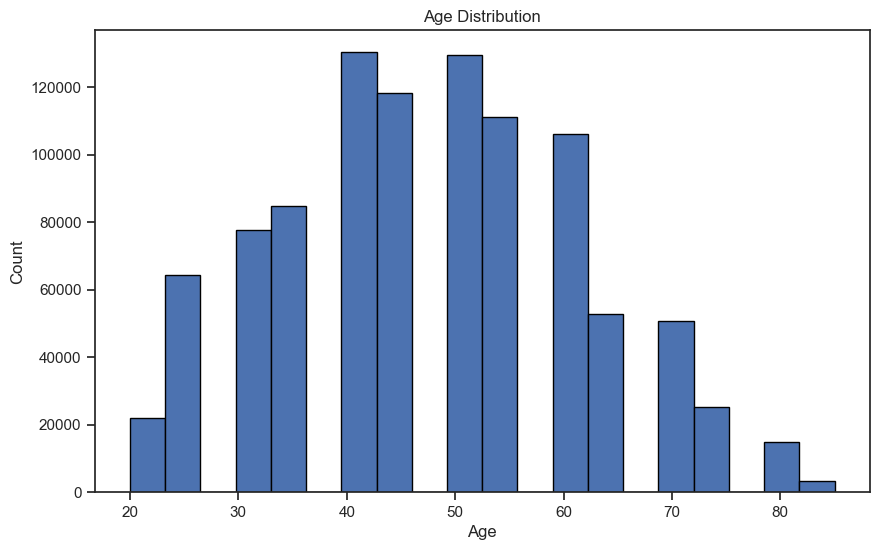

In [23]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.hist(df['age'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

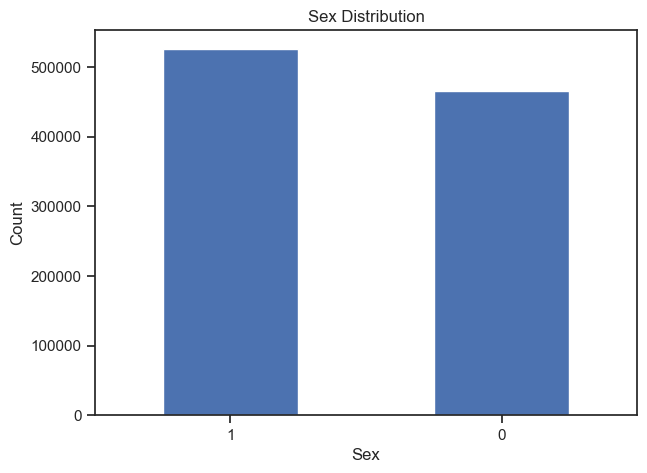

In [24]:
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(7, 5))  # Adjust the size as needed
sex_counts.plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.show()

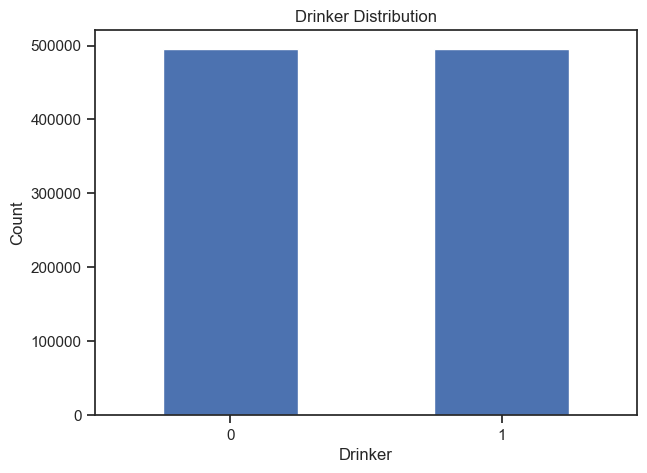

In [25]:
drinker_counts = df['DRK_YN'].value_counts()
plt.figure(figsize=(7, 5))  # Adjust the size as needed
drinker_counts.plot(kind='bar')
plt.title('Drinker Distribution')
plt.xlabel('Drinker')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
x = pd.DataFrame(scaled_x, columns=x.columns)
x.head(5)

sex       age    height    weight  waistline  sight_left  sight_right  \
0  1.0  0.230769  0.666667  0.434783   0.082745    0.091837     0.091837   
1  1.0  0.153846  0.833333  0.478261   0.081736    0.081633     0.112245   
2  1.0  0.307692  0.583333  0.434783   0.083754    0.112245     0.142857   
3  1.0  0.461538  0.750000  0.478261   0.083754    0.142857     0.112245   
4  1.0  0.461538  0.583333  0.304348   0.072654    0.091837     0.112245   

   hear_left  hear_right       SBP  ...  tot_chole  HDL_chole  LDL_chole  \
0        0.0         0.0  0.257282  ...   0.070441   0.005796   0.024424   
1        0.0         0.0  0.305825  ...   0.085566   0.006659   0.028722   
2        0.0         0.0  0.257282  ...   0.045808   0.004933   0.014263   
3        0.0         0.0  0.378641  ...   0.073898   0.009249   0.020125   
4        0.0         0.0  0.344660  ...   0.073034   0.007399   0.022665   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0      0.009590    0.670833            0.0          0.009193  0.002000   
1      0.012646    0.616667            0.0          0.008172  0.001900   
2      0.010855    0.616667            0.0          0.008172  0.004601   
3      0.011065    0.691667            0.0          0.010215  0.002801   
4      0.010855    0.533333            0.0          0.007150  0.001800   

   SGOT_ALT  gamma_GTP  
0  0.004716   0.039078  
1  0.004855   0.026052  
2  0.004300   0.067134  
3  0.004578   0.017034  
4  0.001526   0.024048  

[5 rows x 22 columns]

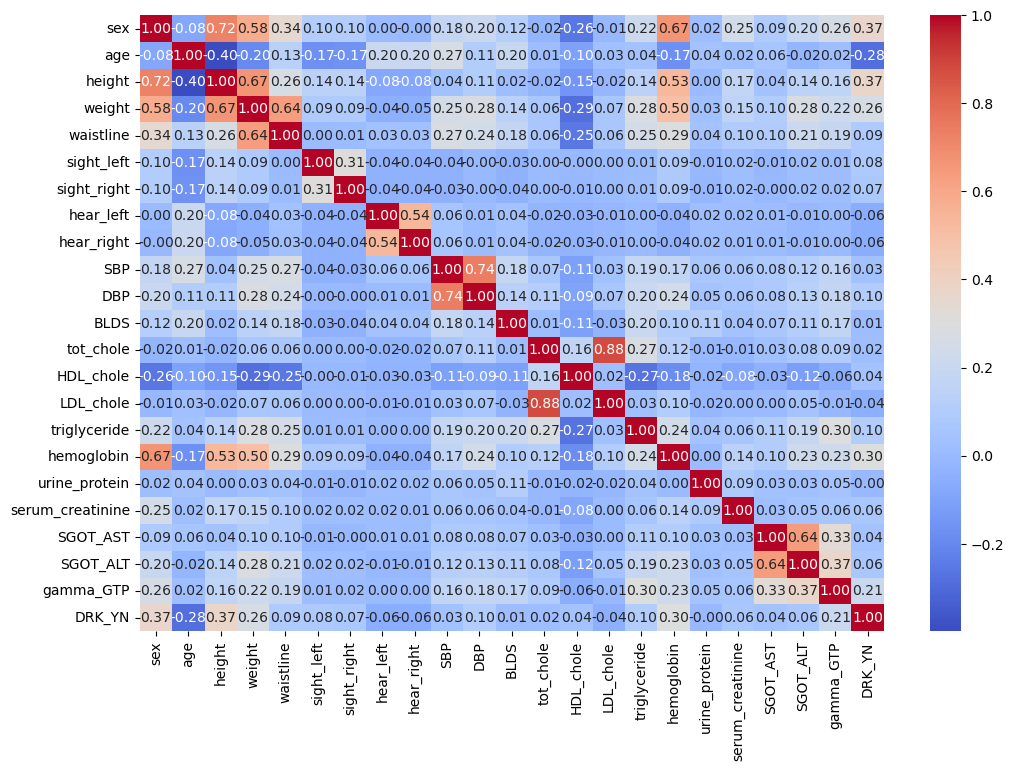

In [20]:
combined_df = pd.concat([x, y], axis=1)
corr_matrix = combined_df.corr()
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

/Users/sambryant/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x1200 with 0 Axes>

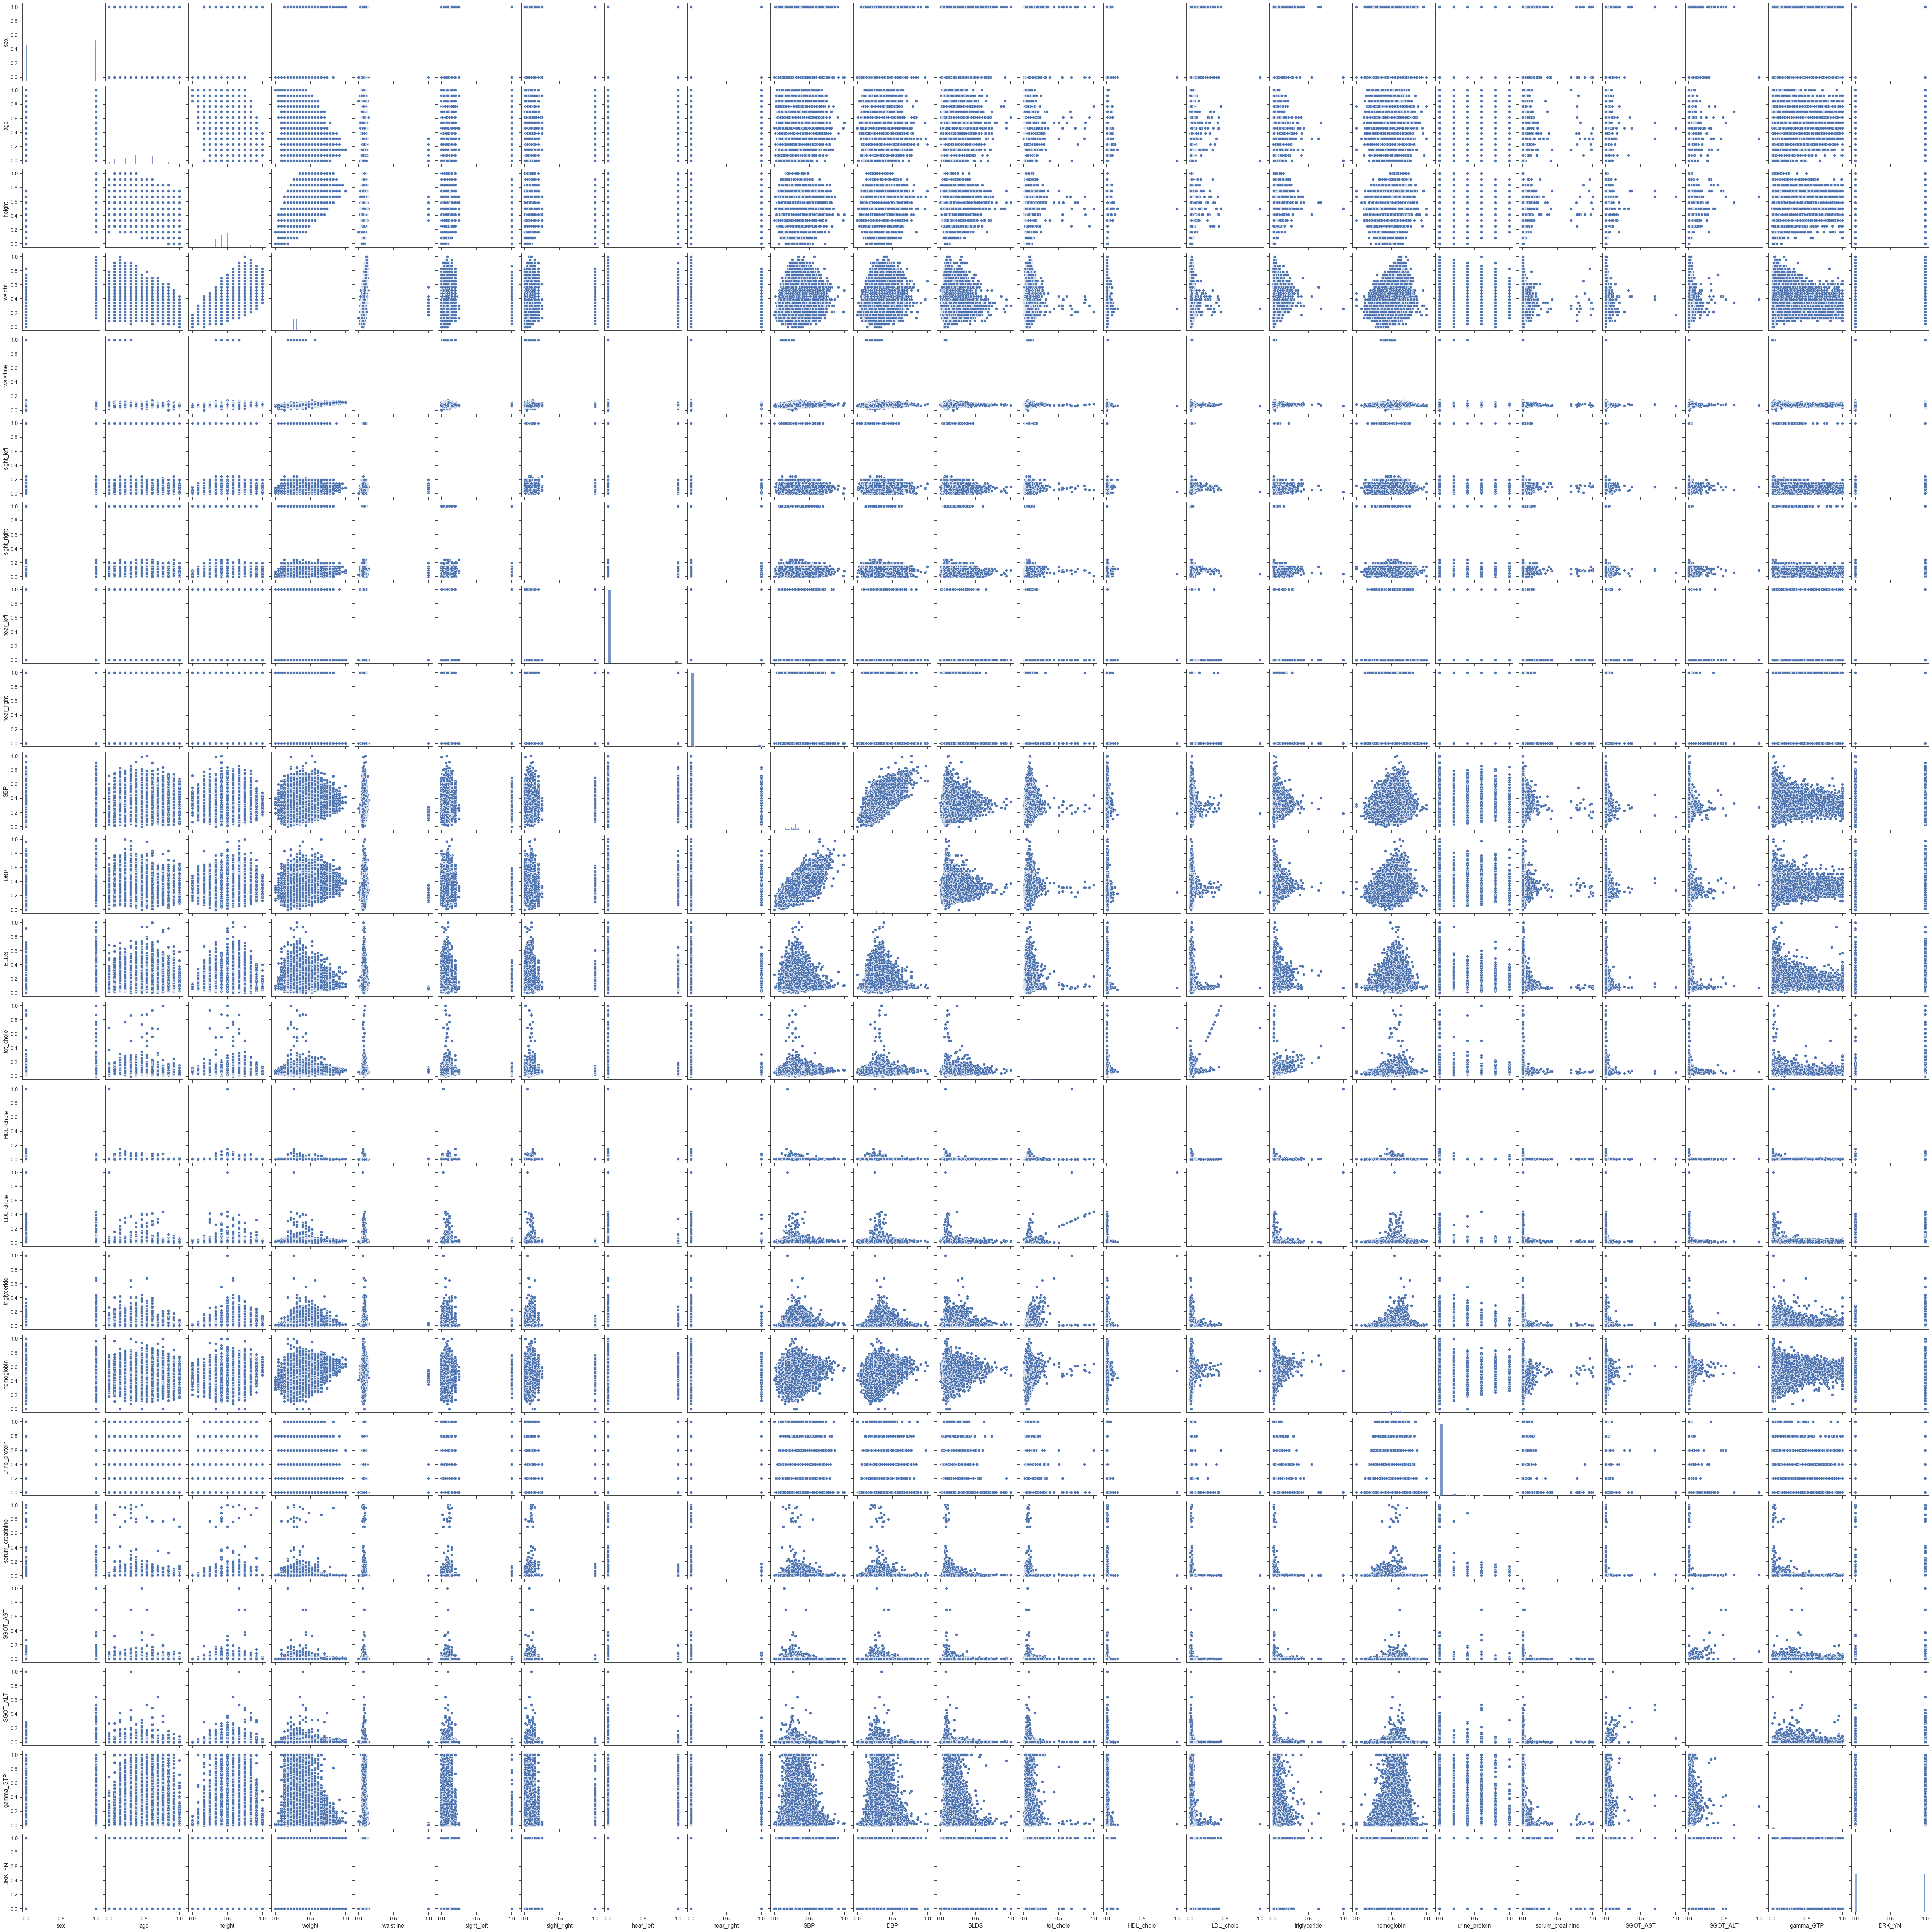

In [21]:
# pair plot
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(12,12))
sns.pairplot(combined_df)

In [ ]:
# columns: 2,3,4,10,11,12,13,17,22
# converterd: ['age', 'height', 'weight', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'hemoglobin', 'gamma_GTP']
# these columns seem to have a high impact on the output of DRK_Y. There are a lot of no's and yes's.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)